**Objective**  
To reduce the number of features by using dimensionallity reduction technique such as PCA and t-SNE, and extract inside about data.

**Importanting libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score
from sklearn.preprocessing import StandardScaler

#Importing PCA and T-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline 
#ensures that the graphs are displayed in the notebook along with the code.

**Loading Data**

In [2]:
data = pd.read_csv("Education_Post_12th_Standard.csv")

In [3]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Checking the info of data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

There are total of 18 columns, and seem like there are no missing value because all feature shows 777 entries.  
All column are numeric, except the Names column.

**Data Preprocessing and Exploratory Data Analysis**

In [5]:
#return the number of unique value in Names column
data.Names.nunique()

777

All college names are unique, so it would not add value to our analysis. We should then drop the Names column

In [6]:
#Droping the "Names" column
data.drop(['Names'], axis=1, inplace=True)
# or data.drop(columns = 'Names', implace=True)

In [7]:
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Summary statistics**

In [8]:
data.describe().T #T is a transpose

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Observation**. 

1. There will be an outlier for thoese entry that have higher value of max than the Q3 (75%) of data.  
2. The application average is around 3000, while the acceptance is about 2000. Around new 780 get enrolled. There are all having high standard deviation, which shows variety of univerities and colledges
3. There are more full time undergrade than part time one.  
4. PhD and Grad_rate have percentage with maximum of over a 100; therefore, it might be something wrong

In [9]:
#Check how many of the non-possible observation of rate over than a 100.
data[(data.PhD > 100) | (data.Grad_Rate > 100)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


There are two observations that have either PhD and Grad_rate > 100

In [10]:
#We can cap the value to a 100. Access row and column using .loc[]
data.loc[582, "PhD"] = 100
data.loc[95, "Grad_Rate"] = 100

In [11]:
data.loc[582]

Apps            529.0
Accept          481.0
Enroll          243.0
Top10perc        22.0
Top25perc        47.0
F_Undergrad    1206.0
P_Undergrad     134.0
Outstate       4860.0
Room_Board     3122.0
Books           600.0
Personal        650.0
PhD             100.0
Terminal         88.0
S_F_Ratio        17.4
perc_alumni      16.0
Expend         6415.0
Grad_Rate        43.0
Name: 582, dtype: float64

Apps
Skew : 3.72


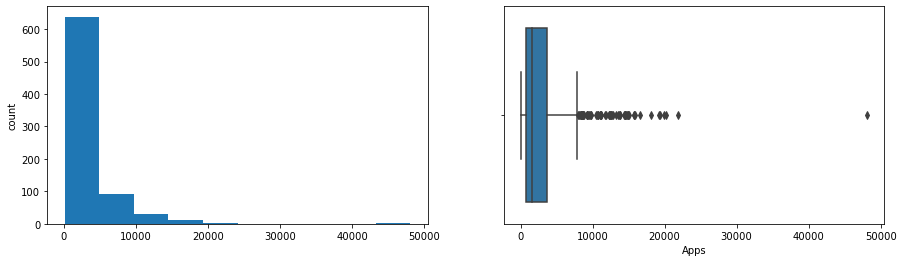

Accept
Skew : 3.42


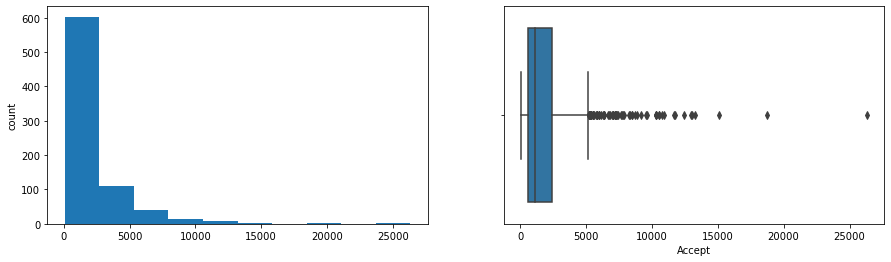

Enroll
Skew : 2.69


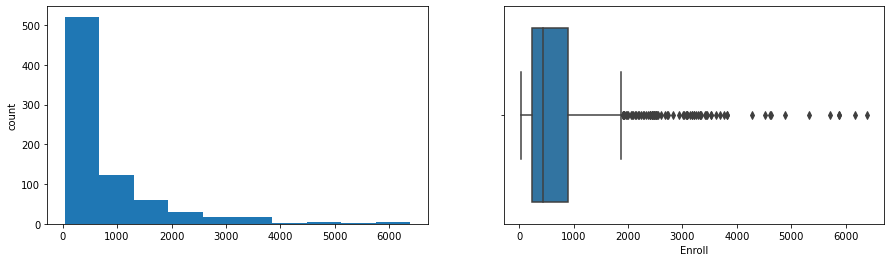

Top10perc
Skew : 1.41


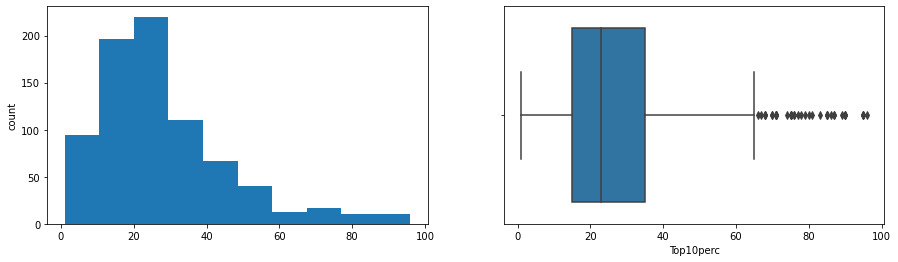

Top25perc
Skew : 0.26


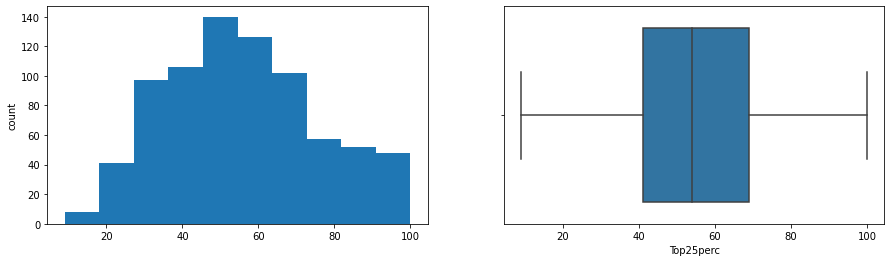

F_Undergrad
Skew : 2.61


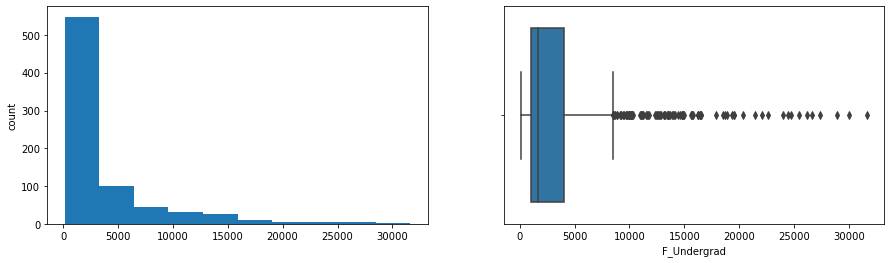

P_Undergrad
Skew : 5.69


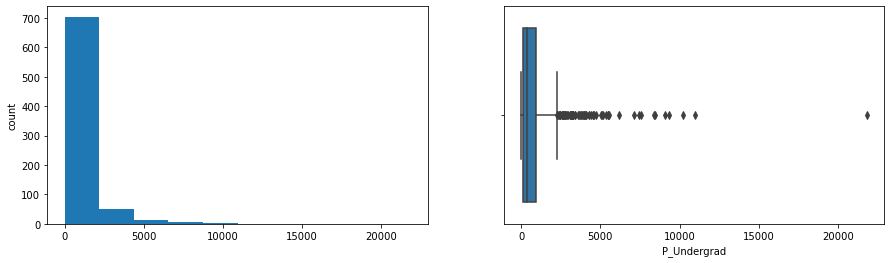

Outstate
Skew : 0.51


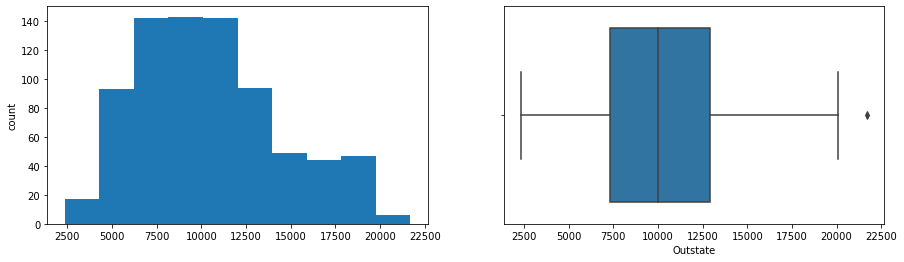

Room_Board
Skew : 0.48


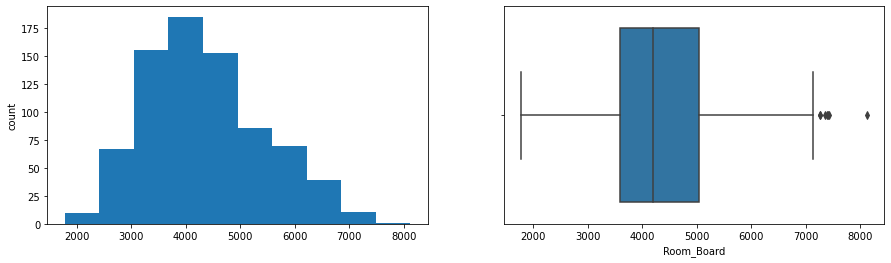

Books
Skew : 3.49


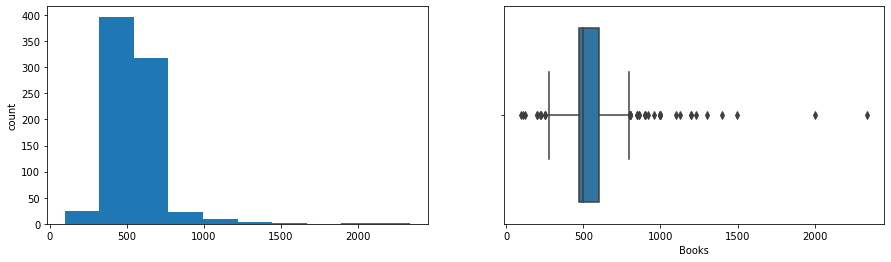

Personal
Skew : 1.74


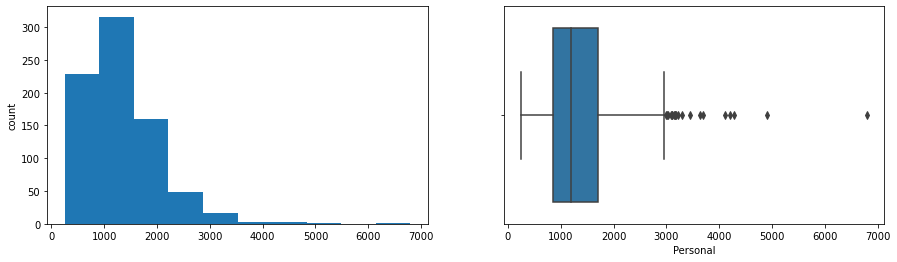

PhD
Skew : -0.77


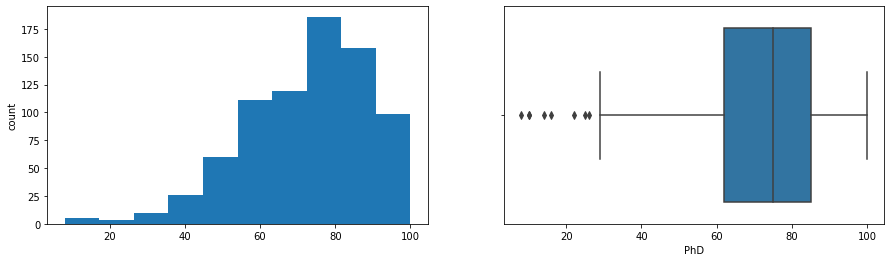

Terminal
Skew : -0.82


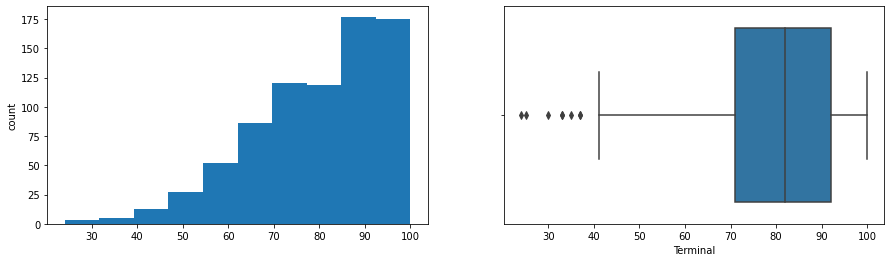

S_F_Ratio
Skew : 0.67


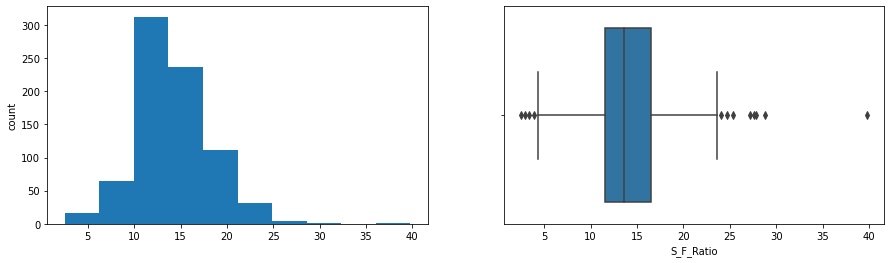

perc_alumni
Skew : 0.61


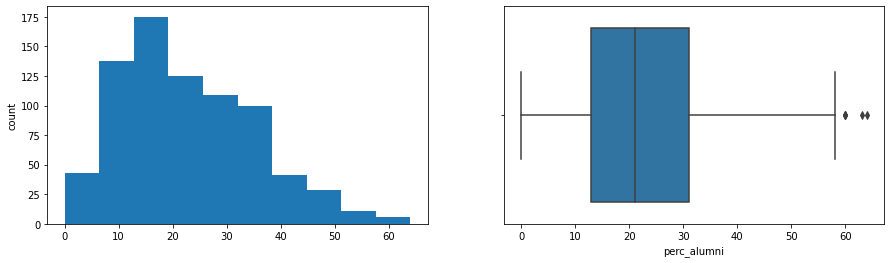

Expend
Skew : 3.46


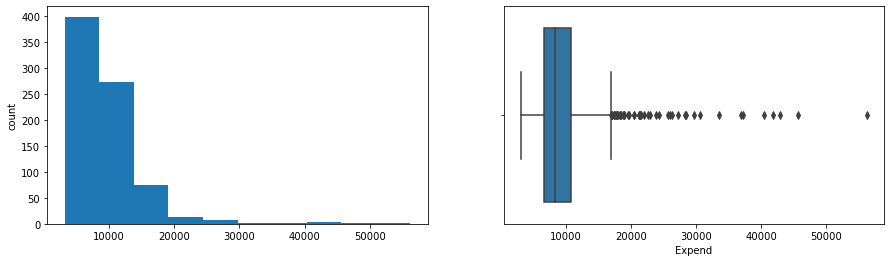

Grad_Rate
Skew : -0.14


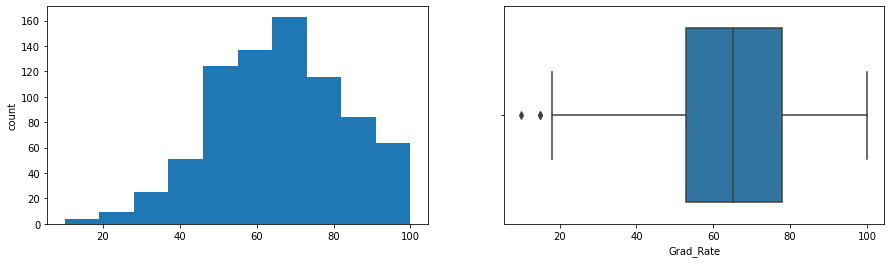

In [12]:
#Check distribution and outlier for each column in data
count_col = list(data.columns)
for col in count_col:
    print(col)
    print('Skew :', round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1) #nrow, ncol,index
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

**Observation**. 
1. Apps, Accept, Enroll, top10perc, F_undergrad, P_undergrad, Brook, Personal, and Expand are right skewed and all this variables have outlier that are shown on the boxplots.  
2. Only Top25perc that have no outlier.  
3. PhD and Terminal are left skewed.  
4. Other features than what mentioned above are all normalized.

**Check correlation amoung dif variable**

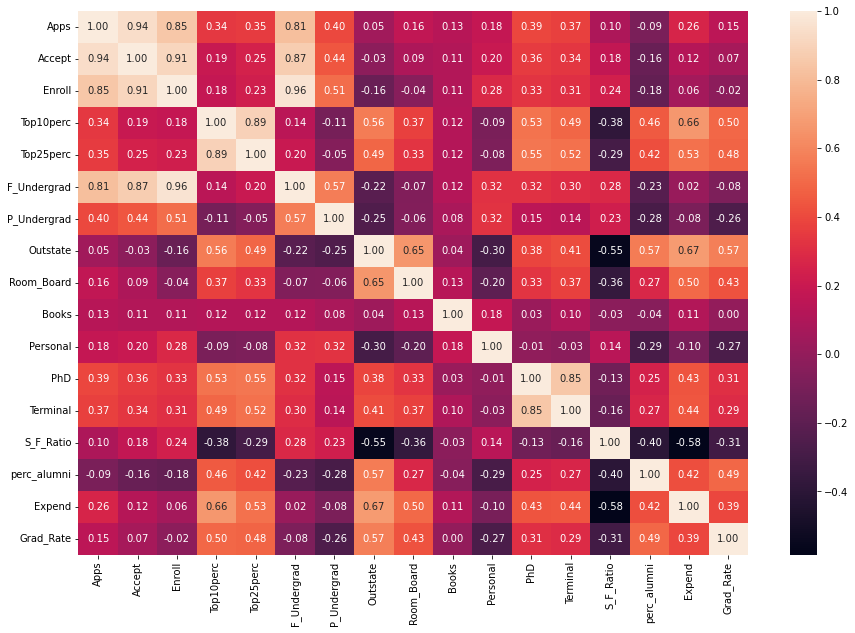

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f') #fmt only two decimal points
plt.show()

We can see high positive correlation of  
1. Apps and Accept  
2. Apps and Enroll  
3. Apps and F_undergrad
4. Enroll and F_undergrad
5. top 10 and top25  
6. PhD and Terminal  

We can see the high negative one  
1. S_F_ratio and top10 student
2. S_F_ratio and outstate

**Scaling data**  
Standardize features by removing the mean and scaling to unit variance.  

The standard score (z-score) of a sample x is calculated as:  

z = (x - u) / s

In [14]:
scaler = StandardScaler()
data_scaler = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaler.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375
5,-0.624307,-0.628611,-0.669812,0.592287,0.313426,-0.623421,-0.535212,0.760947,-0.932970,-0.299280,-0.983753,-0.346786,-0.455567,-1.185526,-0.948325,0.012806,-0.610258
6,-0.684808,-0.685356,-0.729043,-0.598931,-0.545505,-0.677472,-0.410988,0.708713,1.243144,-0.299280,0.235515,1.063321,0.903786,-0.654660,0.262933,-0.153145,-0.142634
7,-0.285088,-0.121984,-0.313353,0.535563,0.616579,-0.434450,-0.541127,0.852479,0.427443,-0.602312,-0.725120,1.002012,1.379560,-0.098515,1.151188,0.350074,0.441895
8,-0.507700,-0.481644,-0.595505,0.138490,0.363952,-0.562562,-0.361036,1.282036,0.038754,-1.511408,-1.242385,0.388922,0.292077,-0.705218,0.020681,0.380160,0.851066
9,-0.625600,-0.620854,-0.654735,-0.372032,-0.596031,-0.598459,-0.510893,0.006798,-0.891911,0.670422,0.678885,-2.002130,-2.630532,-0.654660,-0.625323,-0.128233,-0.785616


In [15]:
data_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F_Undergrad  777 non-null    float64
 6   P_Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room_Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S_F_Ratio    777 non-null    float64
 14  perc_alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad_Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


**Principle Component Analysis (PCA )**

In [16]:
#Defining a number of principle components to generate
n = data_scaler.shape[1]
n

17

In [17]:
#Finding principle component for data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaler))

#Percentage of varience explained by each principle component
exp_var = pca.explained_variance_ratio_
exp_var

array([0.32046058, 0.26342915, 0.06901114, 0.05906272, 0.05489027,
       0.04982847, 0.0355726 , 0.03453611, 0.03116758, 0.02370464,
       0.01840343, 0.01295305, 0.00985822, 0.00844107, 0.00517124,
       0.00215728, 0.00135244])

Above shows the varience from 17 principle components. The one with highest varient is the main PCA

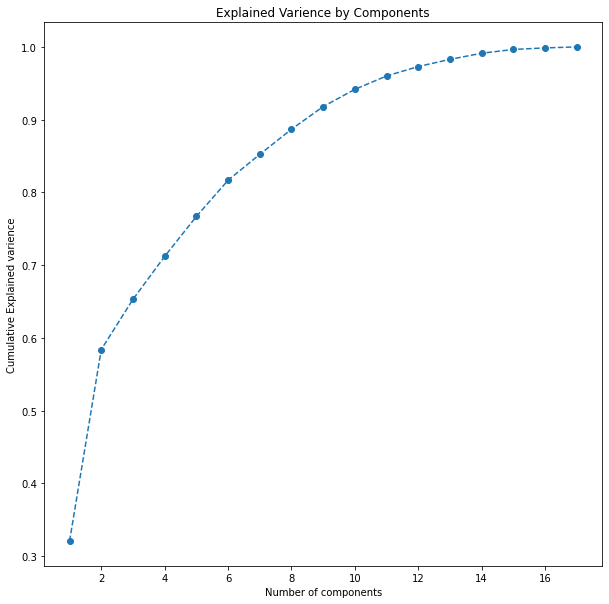

In [18]:
#Ploting explained cumarative varience by principle components
plt.figure(figsize=(10,10))

plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained Varience by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained varience')
plt.show()

In [19]:
#Finding the least number of components that can explain more than 70% varience
sum=0

for ix, i in enumerate(exp_var):
    sum = sum+i
    if(sum>0.70):
        print("Number of PCs that explain at least 70% varient:", ix+1)
        break

Number of PCs that explain at least 70% varient: 4


* Out of 17 PCs, 4 PCs have more than 70 % varience, so we can reduce 17 to 4  
* So that is about 76% (17-4)/17 *100 reduction in the dimensionality of dataset with only a loss of 30%


In [20]:
#Looks at the principle components as a linear combination of original features
pc_comps = ['PC1','PC2','PC3','PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2), index= pc_comps, columns=data_scaler.columns)
data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.25,0.33,-0.06,0.28
Accept,0.21,0.37,-0.10,0.27
Enroll,0.18,0.40,-0.08,0.16
Top10perc,0.35,-0.08,0.03,-0.05
Top25perc,0.34,-0.04,-0.02,-0.11
F_Undergrad,0.15,0.42,-0.06,0.10
P_Undergrad,0.03,0.32,0.14,-0.16
Outstate,0.29,-0.25,0.05,0.13
Room_Board,0.25,-0.14,0.15,0.19
Books,0.06,0.06,0.68,0.08


**Observation**  
* Each principle component is linear combination of original feature. We can write PC1 as.  

PC1 = 0.25* Apps + 0.21* Accept+0.18* Enroll+....  
* We can look at the weight infront of each feature to see which one is important and which one is not. We can discard them when we do analysis. Ex we can consider for those feature that have weight of more than 25

In [21]:
def color_high(val):
    if val < -0.25:
        return 'background: pink'
    elif val > 0.25:
        return 'background: skyblue'
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
Apps,0.250000,0.330000,-0.060000,0.280000
Accept,0.210000,0.370000,-0.100000,0.270000
Enroll,0.180000,0.400000,-0.080000,0.160000
Top10perc,0.350000,-0.080000,0.030000,-0.050000
Top25perc,0.340000,-0.040000,-0.020000,-0.110000
F_Undergrad,0.150000,0.420000,-0.060000,0.100000
P_Undergrad,0.030000,0.320000,0.140000,-0.160000
Outstate,0.290000,-0.250000,0.050000,0.130000
Room_Board,0.250000,-0.140000,0.150000,0.190000
Books,0.060000,0.060000,0.680000,0.080000


**Observation**. 
* The PC1 seem to be related to high values of student scores (top10perc, and top25rc), number of outstate, the faculty education level (PhD and Terminal), and the instructional expenditure (Expand) per student. This mean that **the first principle component seem to capture attributes that generally define premier colledges with a high quality of students entering them, and more accomplished faculty teaching there. The students entering these colledges also appear to be relatively financially well-off.**  
* PC2 are related to high value of application, acceptance, enrollment, the number of full time student, and part-time student. **The second principal componennt seems to capture attribute that generally define non-premier colledges that are comparatively easier to get admission into**. 
* PC3 is related to high value of Books and Personal. And it is also related to the low values of students and faculty ratio (S_F_ration). **This component capture the financial aspects**  
* PC4 is related low values of faculty educational level and high value of student graduate (Grad_Rate). **The fourth component capture the attributes that define colledge which lack of highly educated faculty and it is easier to graduated from**

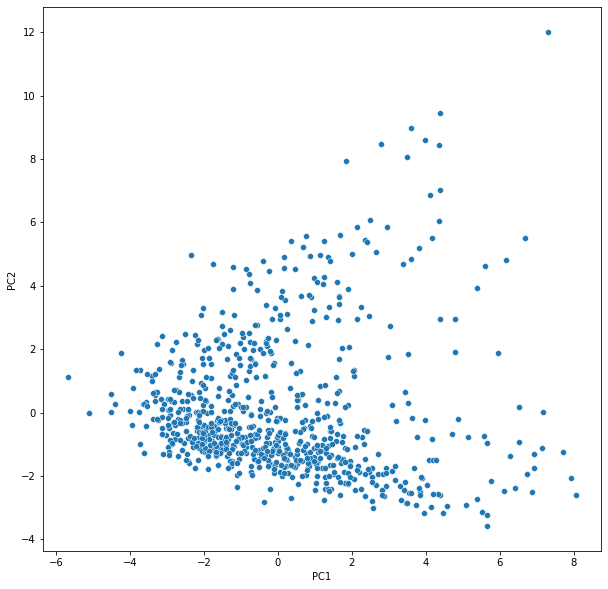

In [22]:
#We can also visualize each component in a graph 
plt.figure(figsize=(10,10))
sns.scatterplot(x=data_pca1[0], y=data_pca1[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# t-SNE
### Let's try to visulize the data using t-SNE by recording the number of dimensions to 2 or 3.  
#### Embending to lower dimension


#### 2D visulaization

In [27]:
#Filling t-SNE with number of components equal to 2
tsne = TSNE(n_components=2, random_state=1)
data_tsne = tsne.fit_transform(data_scaler)
data_tsne

array([[ -5.574473 ,  15.159322 ],
       [ 25.6615   ,  16.172398 ],
       [ 17.238535 ,  16.039108 ],
       ...,
       [ -0.1701871,  10.024029 ],
       [ -6.2679086, -39.43532  ],
       [ -0.1596578,  -1.3182385]], dtype=float32)

In [29]:
#converting the embedding to a dataFrame
data_tsne = pd.DataFrame(data_tsne, columns=['X1','X2'])
data_tsne.head()

,X1,X2
0,-5.574473,15.159322
1,25.661501,16.172398
2,17.238535,16.039108
3,2.303667,-28.577347
4,-2.177954,17.079380


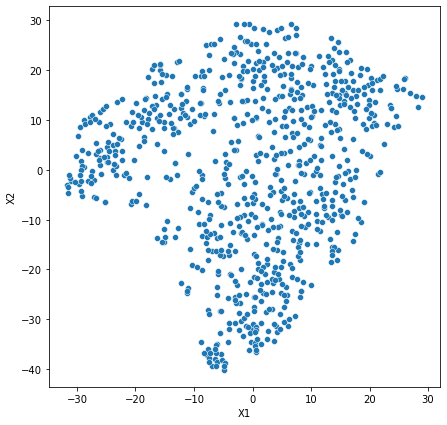

In [32]:
#Scatter plot for the two components
plt.figure(figsize=(7,7))

sns.scatterplot(x=data_tsne.X1, y=data_tsne.X2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3D Visualization

In [34]:
#Filling t-SNE with number of components equal to 3
tsne = TSNE(n_components=3, random_state=1)
data_tsne = tsne.fit_transform(data_scaler)

In [40]:
data_tsne = pd.DataFrame(data_tsne, columns=['X1','X2','X3'])
data_tsne.head()

,X1,X2,X3
0,-7.123918,8.501701,15.068363
1,41.001400,-25.830297,30.898813
2,12.072284,-19.075382,25.127016
3,21.987827,-11.559785,-45.544437
4,-12.675777,-4.489844,25.299097


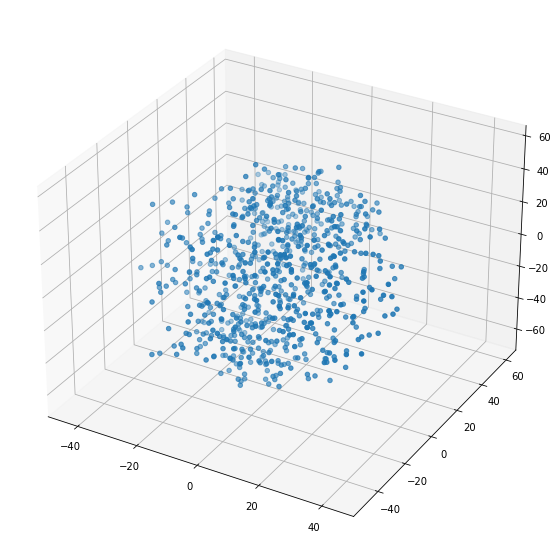

In [46]:
#Scatter plot for all three components 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x=data_tsne['X1']
y=data_tsne['X2']
z=data_tsne['X3']

ax.scatter(x,y,z)
plt.show()

* We know that t-SNE preserves the local structure of the data while embedding the data from high to low dimensions. 
* We have generate 2D and 3D embedding of data, we can see that there is no pattern in data- it is scattered and clustered together with the exception of some outliers.

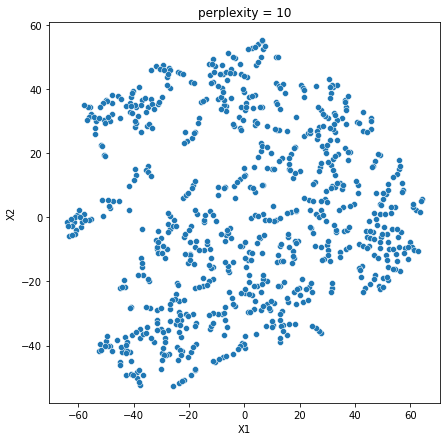

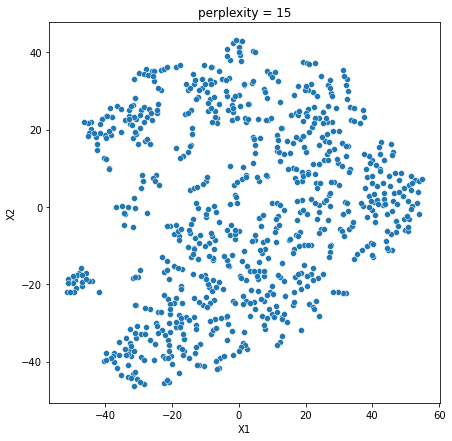

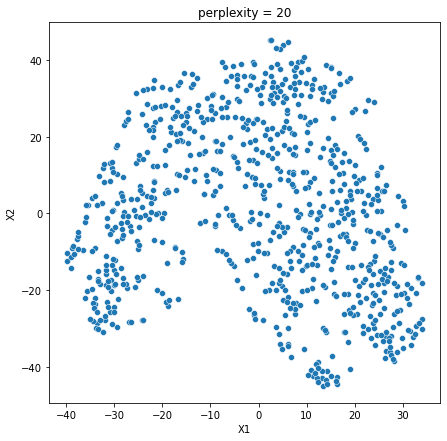

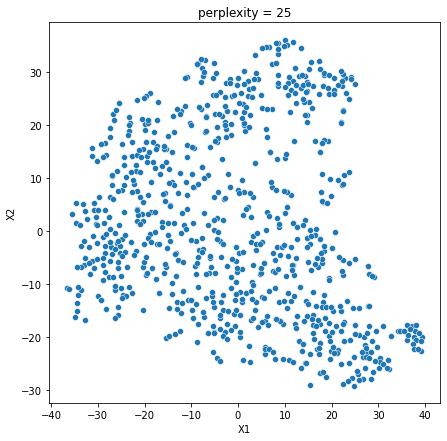

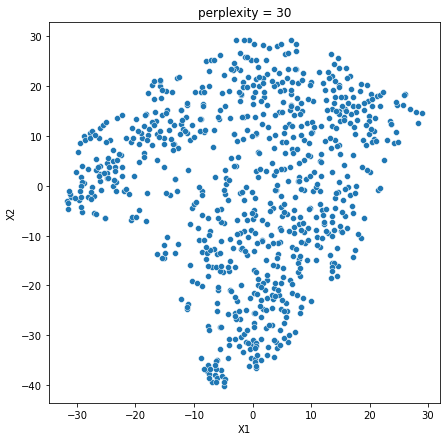

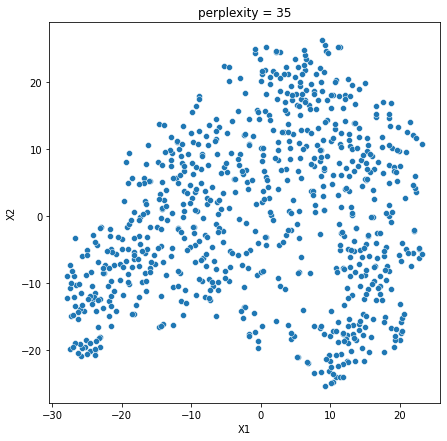

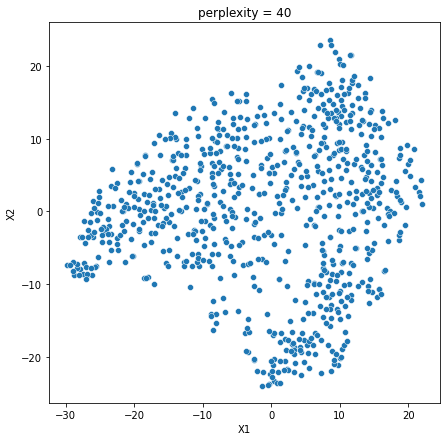

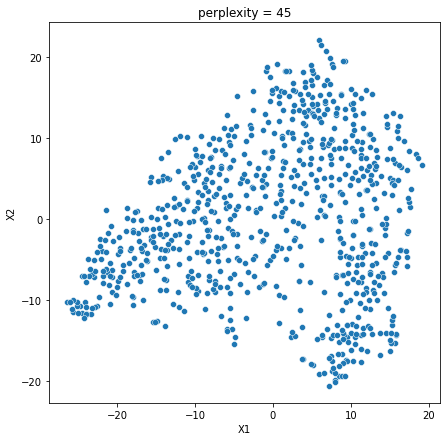

In [50]:
#Lets look at different perplexity
for i in range(10,50,5):
    tsne=TSNE(n_components=2,random_state=1,perplexity=i)
    
    data_tsne = tsne.fit_transform(data_scaler)
    
    data_tsne = pd.DataFrame(data_tsne, columns=['X1','X2'])
    plt.figure(figsize=(7,7))
    sns.scatterplot(x='X1', y='X2',data=data_tsne)
    plt.title('perplexity = {}'.format(i))

* All the plot with different perplexity values imply that there is no underlying pattern in the data  
* This show that observing pattern in data projection and visualization techniques like PCA and t-SNE is actually dependent on the nature of data. 